# Student Achievement Predictor
This file does not contain any personally identifiable information. The data file is obviously not included for privacy reasons. But feel free to use the code below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file1 = 'StudentData.xlsx'
file2 = 'Student_GPA.xlsx'

In [3]:
# Let's read the file into a dataframe
df_stu = pd.read_excel(file1)
df_gpa = pd.read_excel(file2)

## Merging Happens Here
We merge the students with their GPA's first

In [4]:
df_gpa.rename(columns={'Unnamed: 0':'Full name', 'Final':'GPA'}, inplace=True)

In [5]:
df = df_stu.merge(df_gpa, on='Full name', how='left')

## Stripping Private Information from the data sets

In [6]:
# We first have to remove private student data, before displaying anythint
df.drop(columns=['Full name', 'First name', 'Middle', 'Last name'], inplace=True)

In [7]:
# We should change actual student id's with produced student id's.
df.rename(columns={'Student Id (Test Id)':'Student ID'}, inplace=True)
df['Student ID'] = range(1001, 1001+len(df))
df['Student ID'].head()

0    1001
1    1002
2    1003
3    1004
4    1005
Name: Student ID, dtype: int64

In [8]:
# The birth date's are also sensitive data. We are OK with the years only.
df['Birth date'] = pd.DatetimeIndex(df['Birth date']).year
df['Birth date'].head()

0    2006
1    2007
2    2007
3    2006
4    2007
Name: Birth date, dtype: int64

In [9]:
# We now removed all the uniquely identifying information from our dataset, without losing any predicting information.
df.head()

,Grade,Student ID,Gender,Birth date,Race,Zip,Lunch,ELL?,Idea?,Section 504?,Economic Disadvantage?,Is Homeless?,Is Migrant?,Is Immigrant?,Title1?,Gifted?,Primary Parent Relationship,Secondary Parent Relationship,Dominant Language,GPA
0,9,1001,M,2006,Hispanic/Latino,63116,U,Y,N,U,U,U,U,U,U,NaN,"Mother, natural/adoptive",NaN,Spanish,NaN
1,9,1002,F,2007,Black or African American,63106,F,MY2,U,U,U,U,U,U,U,U,"Mother, natural/adoptive","Father, natural/adoptive",Somali,2.98
2,9,1003,M,2007,White,63109,U,N,N,U,U,U,U,U,U,NaN,"Father, natural/adoptive","Mother, natural/adoptive",Arabic,NaN
3,9,1004,M,2006,Black or African American,63116,U,N,Y,U,U,U,U,U,U,NaN,"Mother, natural/adoptive",NaN,English,NaN
4,8,1005,M,2007,White,63109,U,N,N,U,U,U,U,U,U,NaN,"Mother, natural/adoptive","Father, step",English,NaN


In [10]:
df.shape

(817, 20)

### Dropping some columns

In [11]:
print(df['Is Immigrant?'].value_counts())
print(df['Is Migrant?'].value_counts())

N    483
U    331
Y      3
Name: Is Immigrant?, dtype: int64
N    483
U    334
Name: Is Migrant?, dtype: int64


There are too many unknown answers (U is for unknown) in the features about migration. Therefore, I'm droping them.

In [12]:
df['Gifted?'].value_counts()

N       542
U        98
Y         2
Math      1
Name: Gifted?, dtype: int64

There are only 2 officially gifted students and many unknowns. This variable is not going to be helpful in making predictios. Therefore, I decided to take it out.

In [13]:
# But, before removing these variables, let's see who these students are:
filt_gifted = df['Gifted?'] == 'Y'
filt_math = df['Gifted?'] == 'Math'
print(df[filt_gifted])
print(df[filt_math])

     Grade  Student ID Gender  Birth date   Race    Zip Lunch ELL? Idea?  \
43      11        1044      M        2005  White  63116     P    N     N   
214     10        1215      M        2006  White  63123     F  MY2     N   

    Section 504? Economic Disadvantage? Is Homeless? Is Migrant?  \
43             N                      U            N           U   
214            N                      N            N           N   

    Is Immigrant? Title1? Gifted? Primary Parent Relationship  \
43              U       Y       Y    Mother, natural/adoptive   
214             Y       Y       Y    Mother, natural/adoptive   

    Secondary Parent Relationship Dominant Language   GPA  
43       Father, natural/adoptive           English  4.58  
214      Father, natural/adoptive           Turkish  4.46  
     Grade  Student ID Gender  Birth date   Race    Zip Lunch ELL? Idea?  \
385     11        1386      M        2005  White  63123     P  RCV     N   

    Section 504? Economic Disadvantag

In [14]:
df['Secondary Parent Relationship'].value_counts(dropna=False)

Father, natural/adoptive      403
NaN                           208
Mother, natural/adoptive      133
Father, step                   20
Grandmother                    14
Aunt                            7
Mother, step                    7
Father, foster                  6
Uncle                           5
Grandfather                     4
Other                           2
Son                             2
Family member                   1
Sister, natural/adoptive        1
Fiancé                          1
Friend                          1
Brother-in-law                  1
Mother's significant other      1
Name: Secondary Parent Relationship, dtype: int64

We have primary parent relationship that will provide information on family status. Therefore, we can drop secondary parent relationship which already has many NaN values anyway. It would be really nice if we could have this info but we are missing this data

In [15]:
# Now we can drop these columns
df.drop(columns=['Is Migrant?', 'Is Immigrant?', 'Gifted?', 'Secondary Parent Relationship'], inplace=True)

### Deciding on other variables

In [16]:
df['ELL?'].value_counts()

N      518
RCV     63
U       59
MY2     13
Y       10
MY1      8
AY3      5
M        3
AY4      1
Name: ELL?, dtype: int64

NLP: Not English Learner
MY1: 1st year monitoring
MY2: 2nd year monitoring
AY3: 3rd year accountability
AY4: 4th year accountability
RCV: receiving services
U: Unknown

There are 59 unknown entries. I will change them to none. Usually, people make an entry if the student needs services.

In [17]:
# 'Y' is not in the description part. Maybe, it was for Yes some time ago but our that option is not available now.
filt4 = df['ELL?'] == 'Y'
df[filt4]

,Grade,Student ID,Gender,Birth date,Race,Zip,Lunch,ELL?,Idea?,Section 504?,Economic Disadvantage?,Is Homeless?,Title1?,Primary Parent Relationship,Dominant Language,GPA
0,9,1001,M,2006,Hispanic/Latino,63116,U,Y,N,U,U,U,U,"Mother, natural/adoptive",Spanish,NaN
49,6,1050,F,2010,Black or African American,63116,U,Y,N,U,U,U,U,"Father, natural/adoptive",Tigrinya,NaN
50,8,1051,M,2007,Black or African American,63116,U,Y,N,U,U,U,U,"Father, natural/adoptive",Tigringa,NaN
54,6,1055,M,2010,White,63116,U,Y,N,U,U,U,U,"Father, natural/adoptive",English and Bosnian,NaN
157,6,1158,F,2010,Hispanic/Latino,63111,U,Y,Y,U,U,U,U,"Mother, natural/adoptive",Spanish,NaN
185,6,1186,F,2009,White,63109,U,Y,N,N,Y,N,Y,"Father, natural/adoptive",English,NaN
420,11,1421,M,2003,White,63139,U,Y,N,U,U,U,U,"Mother, foster",English but first language Czech,NaN
567,7,1568,M,2009,Hispanic/Latino,63116,U,Y,N,U,U,U,U,"Mother, natural/adoptive",English,NaN
664,6,1665,F,2009,White,63116,U,Y,N,U,U,U,U,"Father, natural/adoptive",Croatian,NaN
678,6,1679,F,2010,Hispanic/Latino,63116,U,Y,N,U,U,U,U,"Mother, natural/adoptive",Spanish,NaN


Looking at other values, I decided that these students are ELL students

In [18]:
# 'M' is not in the description part.
filt5 = df['ELL?'] == 'M'
df[filt5]

,Grade,Student ID,Gender,Birth date,Race,Zip,Lunch,ELL?,Idea?,Section 504?,Economic Disadvantage?,Is Homeless?,Title1?,Primary Parent Relationship,Dominant Language,GPA
197,10,1198,F,2006,White,63116,F,M,N,N,N,N,Y,"Mother, natural/adoptive",English,4.50
559,9,1560,M,2006,White,63123,P,M,N,N,N,N,Y,"Mother, natural/adoptive",Turkish,3.74
637,9,1638,M,2007,White,63123,P,M,N,N,N,N,Y,"Mother, natural/adoptive",NaN,3.41


Looking at other values, I decided that these students are ELL students

In [19]:
# Unknown, 'U' is assumed to be non ELL
filt_ell = df['ELL?'] == 'U'
df['ELL?'][filt_ell] = 'N'
df['ELL?'].value_counts()

<ipython-input-19-d57fdad6626e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ELL?'][filt_ell] = 'N'


N      577
RCV     63
MY2     13
Y       10
MY1      8
AY3      5
M        3
AY4      1
Name: ELL?, dtype: int64

In [20]:
# 'Y' and 'M' are assumed to be ELL
filt_ell_Y = df['ELL?'] == 'Y'
filt_ell_M = df['ELL?'] == 'M'
df['ELL?'][filt_ell_Y] = 'RCV'
df['ELL?'][filt_ell_M] = 'RCV'
df['ELL?'].value_counts()

<ipython-input-20-bd6a610ca447>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ELL?'][filt_ell_Y] = 'RCV'
<ipython-input-20-bd6a610ca447>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ELL?'][filt_ell_M] = 'RCV'


N      577
RCV     76
MY2     13
MY1      8
AY3      5
AY4      1
Name: ELL?, dtype: int64

In [21]:
df = df.astype({'ELL?': str})

In [22]:
df['Idea?'].value_counts(dropna=False)

N      543
NaN    115
U       95
Y       64
Name: Idea?, dtype: int64

I am going to assume that the unknown types are those with an Idea plan, since if they had one, it would be in the system. I am changing the unknowns into No's.

In [23]:
filt_idea = df['Idea?'] == 'U'
filt_idea_nan = df['Idea?'] == 'nan'
df['Idea?'][filt_idea] = 'N'
df['Idea?'][filt_idea_nan] = 'N'
df['Idea?'].value_counts()

<ipython-input-23-7d1179960fc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idea?'][filt_idea] = 'N'
<ipython-input-23-7d1179960fc6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Idea?'][filt_idea_nan] = 'N'


N    638
Y     64
Name: Idea?, dtype: int64

In [24]:
df = df.astype({'Idea?': str})

In [25]:
df['Section 504?'].value_counts(dropna=False)

N    561
U    247
Y      9
Name: Section 504?, dtype: int64

In [26]:
filt_504 = df['Section 504?'] == 'U'
df['Section 504?'][filt_504] = 'N'

<ipython-input-26-c635275191cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Section 504?'][filt_504] = 'N'


Text(0.5, 1.0, 'Section 504?')

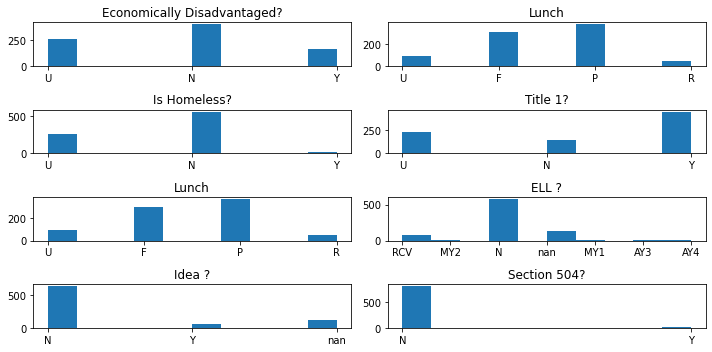

In [27]:
plt.figure(figsize=[10,5], tight_layout=True)

plt.subplot(4,2,1)
plt.hist(df['Economic Disadvantage?'])
plt.title('Economically Disadvantaged?')

plt.subplot(4,2,2)
plt.hist(df['Lunch'])
plt.title('Lunch')

plt.subplot(4,2,3)
plt.hist(df['Is Homeless?'])
plt.title('Is Homeless?')

plt.subplot(4,2,4)
plt.hist(df['Title1?'])
plt.title('Title 1?')

plt.subplot(4,2,5)
plt.hist(df['Lunch'])
plt.title('Lunch')

plt.subplot(4,2,6)
plt.hist(df['ELL?'])
plt.title('ELL ?')

plt.subplot(4,2,7)
plt.hist(df['Idea?'])
plt.title('Idea ?')

plt.subplot(4,2,8)
plt.hist(df['Section 504?'])
plt.title('Section 504?')

There only a few more variables left to think about. These are homelessness, being economically disadvantaged, lunch, title 1. In all these cases I will assume the unknowns are No's.

In [28]:
print(df['Is Homeless?'].value_counts(dropna=False))
print(df['Economic Disadvantage?'].value_counts(dropna=False))
print(df['Lunch'].value_counts(dropna=False))
print(df['Title1?'].value_counts(dropna=False))

N    553
U    251
Y     13
Name: Is Homeless?, dtype: int64
N    400
U    257
Y    160
Name: Economic Disadvantage?, dtype: int64
P    375
F    303
U     92
R     47
Name: Lunch, dtype: int64
Y    448
U    226
N    143
Name: Title1?, dtype: int64


In [29]:
filt_homeless = df['Is Homeless?'] == 'U'
df['Is Homeless?'][filt_homeless] = 'N'

filt_ed = df['Economic Disadvantage?'] == 'U'
df['Economic Disadvantage?'][filt_ed] = 'N'

filt_lunch = df['Lunch'] == 'U'
df['Lunch'][filt_lunch] = 'P'

filt_title1 = df['Title1?'] == 'U'
df['Title1?'][filt_title1] = 'N'

<ipython-input-29-703a82c9c3e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is Homeless?'][filt_homeless] = 'N'
<ipython-input-29-703a82c9c3e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Economic Disadvantage?'][filt_ed] = 'N'
<ipython-input-29-703a82c9c3e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lunch'][filt_lunch] = 'P'
<ipython-input-29-703a82c9c3e6>:11: SettingWithCopyWarning: 
A value is trying to 

In [30]:
print(df['Is Homeless?'].value_counts(dropna=False))
print(df['Economic Disadvantage?'].value_counts(dropna=False))
print(df['Lunch'].value_counts(dropna=False))
print(df['Title1?'].value_counts(dropna=False))

N    804
Y     13
Name: Is Homeless?, dtype: int64
N    657
Y    160
Name: Economic Disadvantage?, dtype: int64
P    467
F    303
R     47
Name: Lunch, dtype: int64
Y    448
N    369
Name: Title1?, dtype: int64


In [31]:
df.columns

Index(['Grade', 'Student ID', 'Gender', 'Birth date', 'Race', 'Zip', 'Lunch',
       'ELL?', 'Idea?', 'Section 504?', 'Economic Disadvantage?',
       'Is Homeless?', 'Title1?', 'Primary Parent Relationship',
       'Dominant Language', 'GPA'],
      dtype='object')

In [32]:
df.dtypes

Grade                            int64
Student ID                       int64
Gender                          object
Birth date                       int64
Race                            object
Zip                             object
Lunch                           object
ELL?                            object
Idea?                           object
Section 504?                    object
Economic Disadvantage?          object
Is Homeless?                    object
Title1?                         object
Primary Parent Relationship     object
Dominant Language               object
GPA                            float64
dtype: object

As it can be seen here, most of the columns are objects. We need to convert them to right categories.

In [33]:
df = df.astype({'Dominant Language': str})

In [34]:
df['Dominant Language'].value_counts()

nan                                 510
English                             187
Spanish                              26
Turkish                              23
Bosnian                              16
Arabic                               12
Vietnamese                           10
english                               4
English/Bosnian                       3
Albanian                              3
Tigrinya                              2
Laotion, Khmer                        2
German                                1
Filipino                              1
Dari/ Persian                         1
English/French                        1
Dari                                  1
Uzbek                                 1
Tigringa                              1
English and Bosnian                   1
Croatian                              1
Engilsh                               1
Grebo/Liberia                         1
English but first language Czech      1
English/ Bosnian                      1


In [35]:
# We know that all the nan values are actually English.
filt_dl = df['Dominant Language'] == 'nan'
df['Dominant Language'][filt_dl] = 'English'
df['Dominant Language'].value_counts(dropna=False)

<ipython-input-35-bbdf5a662517>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dominant Language'][filt_dl] = 'English'


English                             697
Spanish                              26
Turkish                              23
Bosnian                              16
Arabic                               12
Vietnamese                           10
english                               4
English/Bosnian                       3
Albanian                              3
Tigrinya                              2
Laotion, Khmer                        2
German                                1
Filipino                              1
Dari/ Persian                         1
English/French                        1
Dari                                  1
Uzbek                                 1
Tigringa                              1
English and Bosnian                   1
Engilsh                               1
Grebo/Liberia                         1
English but first language Czech      1
English/ Bosnian                      1
Bosnian/Other                         1
Somali                                1


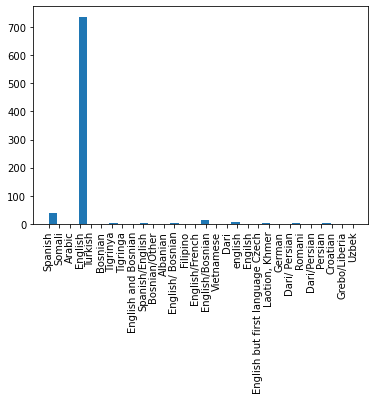

In [36]:
plt.hist(df['Dominant Language'], width=0.8)
# plt.autoscale(enable=True, axis='x', tight=True)
plt.xticks(rotation=90);

In [37]:
df.isna().sum()

Grade                            0
Student ID                       0
Gender                           0
Birth date                       0
Race                             0
Zip                              0
Lunch                            0
ELL?                             0
Idea?                            0
Section 504?                     0
Economic Disadvantage?           0
Is Homeless?                     0
Title1?                          0
Primary Parent Relationship      0
Dominant Language                0
GPA                            212
dtype: int64

Now, this looks much better with no missing values, but the GPAs. It could be possible to find GPAs for those who are missing it but it requires going back to their previous records which is not going to be something we do now.

In [38]:
df.shape

(817, 16)

In [39]:
df.dtypes

Grade                            int64
Student ID                       int64
Gender                          object
Birth date                       int64
Race                            object
Zip                             object
Lunch                           object
ELL?                            object
Idea?                           object
Section 504?                    object
Economic Disadvantage?          object
Is Homeless?                    object
Title1?                         object
Primary Parent Relationship     object
Dominant Language               object
GPA                            float64
dtype: object

## More data prep

In [40]:
# zip code is a variable that needs some processing.
df['Zip'].value_counts()

63116         216
63139         161
63109         132
63111          73
63123          62
63118          43
63110          31
63125          19
63104          14
63143          13
63113           6
63106           5
63107           5
63112           5
63115           5
63119           3
63105           3
63108           3
63031           2
63111-1130      2
63129           2
63025           1
63147           1
63120           1
63139-1541      1
63088           1
63128           1
63129-4325      1
63074           1
63133           1
63135           1
63136           1
63116-2307      1
Name: Zip, dtype: int64

Some zip codes of extensions and we have to remove those extensions first.

In [41]:
df = df.astype({'Zip': str})

In [42]:
df['Zip'] = df['Zip'].str[0:5]
df['Zip'].value_counts(dropna=False)

63116    217
63139    162
63109    132
63111     75
63123     62
63118     43
63110     31
63125     19
63104     14
63143     13
63113      6
63107      5
63112      5
63115      5
63106      5
63105      3
63108      3
63119      3
63129      3
63031      2
63133      1
63135      1
63128      1
63088      1
63025      1
63074      1
63147      1
63120      1
63136      1
Name: Zip, dtype: int64

In [43]:
df = df.astype({'Zip': int})

## Encoding Categorical Data

In [44]:
import seaborn as sns
import numpy as np

In [45]:
df.columns

Index(['Grade', 'Student ID', 'Gender', 'Birth date', 'Race', 'Zip', 'Lunch',
       'ELL?', 'Idea?', 'Section 504?', 'Economic Disadvantage?',
       'Is Homeless?', 'Title1?', 'Primary Parent Relationship',
       'Dominant Language', 'GPA'],
      dtype='object')

We will not use grade and student id in the analysis. Gender, race, lunch, ell, idea, section 504, economic disadvantage, homelessness, title 1, primary parent relationship and dominant language are all categorical variables which will be converted using LabelEncoder. GPA will be the target variable.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le_gender = LabelEncoder()
le_race = LabelEncoder()
le_lunch = LabelEncoder()
le_ell = LabelEncoder()
le_idea = LabelEncoder()
le_sect504 = LabelEncoder()
le_ecdis = LabelEncoder()
le_homeless = LabelEncoder()
le_title1 = LabelEncoder()
le_primparent = LabelEncoder()
le_domlang = LabelEncoder()
le_zip = LabelEncoder()

In [48]:
df['gender'] = le_gender.fit_transform(df['Gender'])
df['race'] = le_race.fit_transform(df['Race'])
df['lunch'] = le_lunch.fit_transform(df['Lunch'])
df['ell'] = le_ell.fit_transform(df['ELL?'])
df['idea'] = le_idea.fit_transform(df['Idea?'])
df['sect504'] = le_sect504.fit_transform(df['Section 504?'])
df['ecdis'] = le_ecdis.fit_transform(df['Economic Disadvantage?'])
df['homeless'] = le_homeless.fit_transform(df['Is Homeless?'])
df['title1'] = le_title1.fit_transform(df['Title1?'])
df['primparent'] = le_primparent.fit_transform(df['Primary Parent Relationship'])
df['domlang'] = le_domlang.fit_transform(df['Dominant Language'])
df['zip'] = le_zip.fit_transform(df['Zip'])

In [49]:
df.drop(columns=['Gender', 'Race', 'Lunch', 'ELL?', 'Idea?', 'Section 504?', 'Economic Disadvantage?', 'Is Homeless?', 'Title1?', 'Primary Parent Relationship', 'Dominant Language', 'Zip'], inplace=True)
df.columns

Index(['Grade', 'Student ID', 'Birth date', 'GPA', 'gender', 'race', 'lunch',
       'ell', 'idea', 'sect504', 'ecdis', 'homeless', 'title1', 'primparent',
       'domlang', 'zip'],
      dtype='object')

# Correlation Analysis

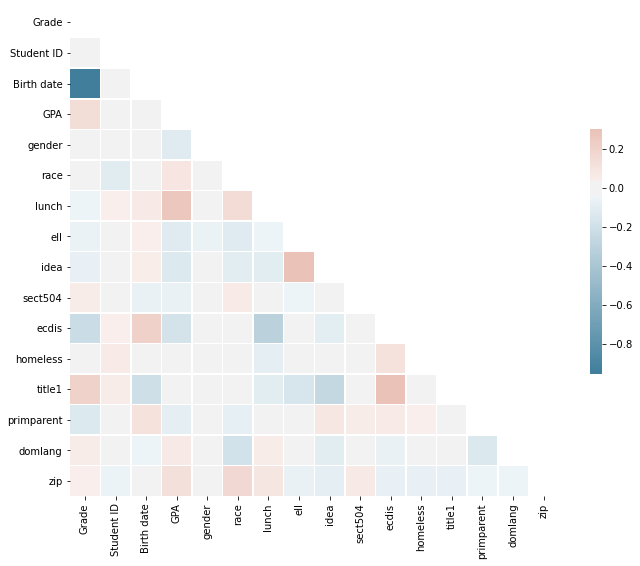

In [50]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [51]:
k = corr.unstack().sort_values(kind='quicksort', ascending=False)
print(type(k))
k2 = k[k!=1]
print(k2.head(6))
print(k2.tail(6))

<class 'pandas.core.series.Series'>
idea    ell       0.686560
ell     idea      0.686560
title1  ecdis     0.311521
ecdis   title1    0.311521
GPA     lunch     0.269594
lunch   GPA       0.269594
dtype: float64
idea        title1       -0.262000
title1      idea         -0.262000
lunch       ecdis        -0.299849
ecdis       lunch        -0.299849
Birth date  Grade        -0.952537
Grade       Birth date   -0.952537
dtype: float64


As expected, there is a positive correlation between students receiving ell and special services.

## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
df.columns

Index(['Grade', 'Student ID', 'Birth date', 'GPA', 'gender', 'race', 'lunch',
       'ell', 'idea', 'sect504', 'ecdis', 'homeless', 'title1', 'primparent',
       'domlang', 'zip'],
      dtype='object')

In [62]:
print(df.head())
print(df.shape)

   Grade  Student ID  Birth date   GPA  gender  race  lunch  ell  idea  \
0      9        1001        2006   NaN       1     3      1    5     0   
1      9        1002        2007  2.98       0     2      0    3     0   
2      9        1003        2007   NaN       1     6      1    4     0   
3      9        1004        2006   NaN       1     2      1    4     1   
4      8        1005        2007   NaN       1     6      1    4     0   

   sect504  ecdis  homeless  title1  primparent  domlang  zip  
0        0      0         0       0          10       22   15  
1        0      0         0       0          10       21    6  
2        0      0         0       0           5        1    9  
3        0      0         0       0          10        9   15  
4        0      0         0       0          10        9    9  
(817, 16)


The last edit we need is the NaN values in GPA. Not all students have GPA values.

In [63]:
filt_gpa = ~df['GPA'].isna()
df2 = df[filt_gpa]
print(df2.head())
print(df2.shape)

   Grade  Student ID  Birth date   GPA  gender  race  lunch  ell  idea  \
1      9        1002        2007  2.98       0     2      0    3     0   
5      8        1006        2008  2.18       1     6      1    4     0   
6     12        1007        2004  0.73       1     4      1    4     0   
7      9        1008        2007  1.38       1     4      1    4     0   
8      9        1009        2003  0.33       1     4      0    4     1   

   sect504  ecdis  homeless  title1  primparent  domlang  zip  
1        0      0         0       0          10       21    6  
5        0      0         0       0          10        9   26  
6        0      0         0       1          10        9   26  
7        0      0         0       1          10        9   26  
8        0      0         0       0          10        9    9  
(605, 16)


We lost some data but not much. This is the best we can do as of now.

In [64]:
y = df2['GPA']
X = df2.drop(['GPA', 'Grade', 'Student ID'], axis='columns')

In [65]:
model_LR = LinearRegression()

In [66]:
model_LR.fit(X, y)

LinearRegression()

In [67]:
r_sq = model_LR.score(X, y)
print('The coefficient of determination is ', r_sq)

The coefficient of determination is  0.13215923598226043


Wow, this is an extremely poor fit. Actually, there is no fit at all.

# Conclusion
This was an initial investigation into what can be done with student data. I was planning to do Random Forest analysis but with such a low fit in Linear Regression, I believe I should improve my model with optaining new data. Many of the variables I used are useful in understanding students but still not enough to explain their GPA.